# Generative models

Grzegorz Statkiewicz, Mateusz Matukiewicz

## Setup

In [1]:
import torch

Select the device to use

In [2]:
device = torch.device("cuda:2") if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

print(f"Using device: {device}")

Using device: mps


Load the dataset. The data should be placed in the `./data` directory with the following structure:

```
data
├── 00000
│   ├── 00000_00000
│       ├── 00000_0000.jpg
|   ├── 00000_00001
│       ├── 00000_0001.jpg
```

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

transform = None

images = ImageFolder("data/", transform=transform)
images_count = len(images)

print(f"Number of images: {images_count}")

Number of images: 39209


Train-test split

In [10]:
from torch.utils.data import random_split

test_size = 0.2

train_count = int(images_count * (1 - test_size))
test_count = images_count - train_count

train_ds, test_ds = random_split(images, [train_count, test_count])

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False)

print(f"Number of training images: {len(train_dl.dataset)}")
print(f"Number of test images: {len(test_dl.dataset)}")

Number of training images: 31367
Number of test images: 7842


Show samples

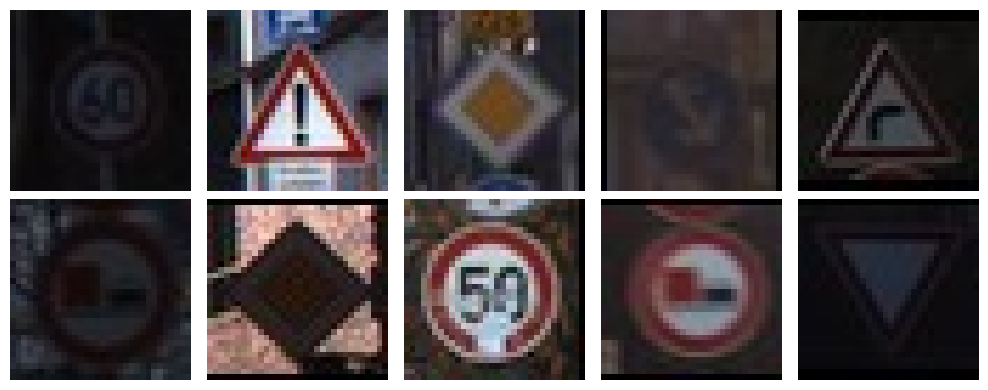

In [ ]:
from display import plot_images
import random

idxs = random.sample(range(images_count), 10)
samples = [images[i][0] for i in idxs]

plot_images(samples)